<a href="https://colab.research.google.com/github/agamthind96/Data-Analysis/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression
- It studies the relationship between a dependent variable and atleast one independent variable.
- Answers the query " What is the impactb of X on Y"
- It is different from Correlation as Correlation studies the direction whereas Regression studies the impact.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

KeyboardInterrupt: ignored

In [2]:
# Change the directory
%cd /content/drive/MyDrive/Business Analyst course/Statistics and Descriptive Analytics/Linear Regression

/content/drive/MyDrive/Business Analyst course/Statistics and Descriptive Analytics/Linear Regression


In [3]:
# Import required libraries
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
# Load the data
df = pd.read_csv("diamond.csv")
df.head()

,Unnamed: 0,carat,colour,clarity,certification,price
0,1,0.30,D,VS2,GIA,1302
1,2,0.30,E,VS1,GIA,1510
2,3,0.30,G,VVS1,GIA,1510
3,4,0.30,G,VS1,GIA,1260
4,5,0.31,D,VS1,GIA,1641


## Data Preparation


In [5]:
# Isolate X and y
y = df.price
y

0       1302
1       1510
2       1510
3       1260
4       1641
       ...  
303     8175
304    10796
305     9890
306     8959
307     9107
Name: price, Length: 308, dtype: int64

In [6]:
X = df.carat
X

0      0.30
1      0.30
2      0.30
3      0.30
4      0.31
       ... 
303    1.01
304    1.02
305    1.06
306    1.02
307    1.09
Name: carat, Length: 308, dtype: float64

In [7]:
# Adding constant
X = sm.add_constant(X)
X.head()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,carat
0,1.0,0.30
1,1.0,0.30
2,1.0,0.30
3,1.0,0.30
4,1.0,0.31


## Linear Regression

In [10]:
# Regression Model
model_1 = sm.OLS(endog = y, exog = X).fit()
print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     2541.
Date:                Fri, 04 Mar 2022   Prob (F-statistic):          3.04e-150
Time:                        10:29:28   Log-Likelihood:                -2597.9
No. Observations:                 308   AIC:                             5200.
Df Residuals:                     306   BIC:                             5207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2298.3576    158.531    -14.498      0.0

Text(0, 0.5, 'Price')

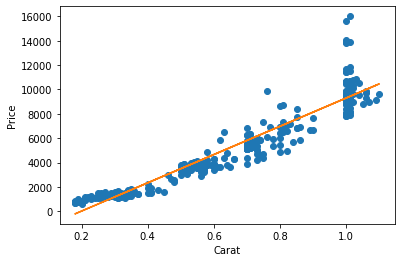

In [11]:
# Plotting
X = df.carat
plt.plot(X,y,'o')
b,a = np.polyfit(X,y,1)
plt.plot(X, b*X+a)
plt.xlabel("Carat")
plt.ylabel("Price")

## Linear Regression with dummy variable.

In [13]:
# Look at carat variable
df.carat.describe()

count    308.000000
mean       0.630909
std        0.277183
min        0.180000
25%        0.350000
50%        0.620000
75%        0.850000
max        1.100000
Name: carat, dtype: float64

In [14]:
# Create Binary variable
df["carat_binary"] = np.where(df.carat>0.6, 1, 0)
df.head()

,Unnamed: 0,carat,colour,clarity,certification,price,carat_binary
0,1,0.30,D,VS2,GIA,1302,0
1,2,0.30,E,VS1,GIA,1510,0
2,3,0.30,G,VVS1,GIA,1510,0
3,4,0.30,G,VS1,GIA,1260,0
4,5,0.31,D,VS1,GIA,1641,0


In [18]:
## Challenge : Create Linear Regression with binary variable and plot.
X = df.carat_binary
print(X[:5])
y[:5]

0    0
1    0
2    0
3    0
4    0
Name: carat_binary, dtype: int64


0    1302
1    1510
2    1510
3    1260
4    1641
Name: price, dtype: int64

In [19]:
# Adding constant
X = sm.add_constant(X)
X.head()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,carat_binary
0,1.0,0
1,1.0,0
2,1.0,0
3,1.0,0
4,1.0,0


In [21]:
# Regression model
model_2 = sm.OLS(endog=y, exog=X).fit()
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     591.5
Date:                Fri, 04 Mar 2022   Prob (F-statistic):           1.79e-73
Time:                        10:56:54   Log-Likelihood:                -2775.6
No. Observations:                 308   AIC:                             5555.
Df Residuals:                     306   BIC:                             5563.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2225.2303    161.442     13.783   

Text(0, 0.5, 'Price')

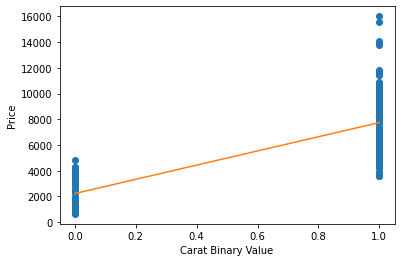

In [22]:
# Plotting
X = df.carat_binary
plt.plot(X,y,'o')
b,a = np.polyfit(X,y,1)
plt.plot(X, b*X+a)
plt.xlabel("Carat Binary Value")
plt.ylabel("Price")